Enter a website to analyse: https://cerdenia.com/blog
Please wait...
The top word is ('more', 38).


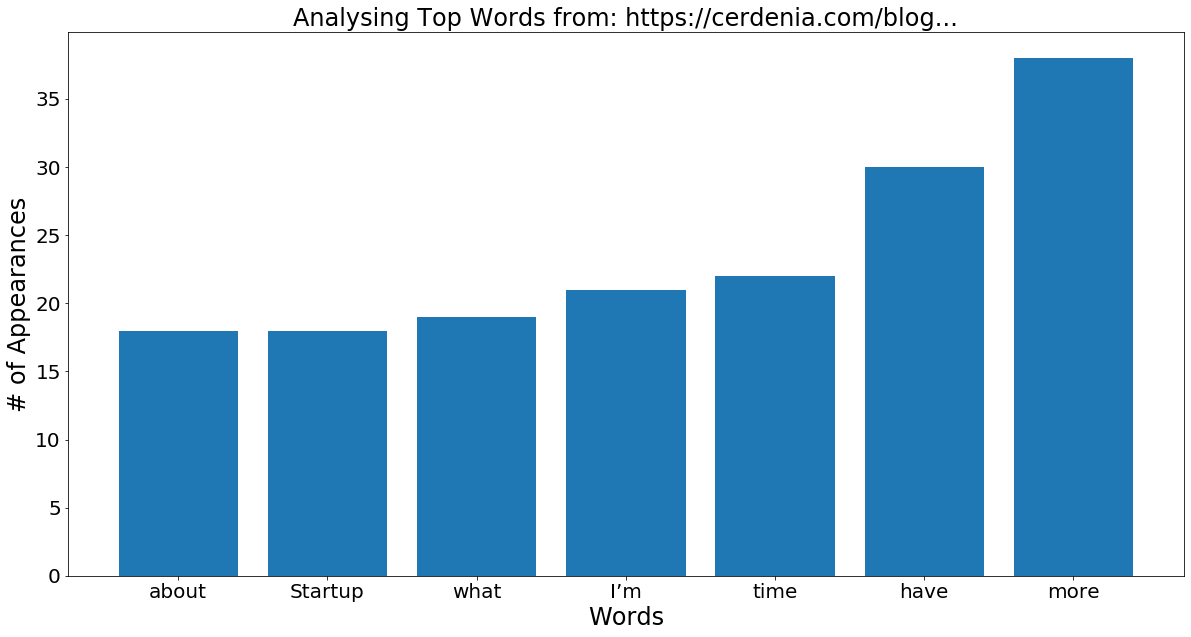

In [ ]:
import requests
from bs4 import BeautifulSoup
from bs4.element import Comment
from matplotlib import pyplot as plt
from IPython.display import clear_output

def main():
    ans = input("Would you like to scrape a website (y/n)? ")
    if ans == 'y':
        clear_output()
        url = input("Enter a website to analyse: ")
        print("Please wait...")
    
        try:
            website = requests.get(url)
            top_words = scrape(website.content)
            print("The top word is {}.".format(top_words[0]))
            displayResults(top_words, url)
        except:
            print("An error has occurred.")
        
        main()
    elif ans == 'n':
        print("Goodbye.")
    else: 
        print("Command not found.")
        main()
        
def scrape(content):
    bs = BeautifulSoup(content, "html.parser")
    text = bs.findAll(text=True)
    # loop through every item in text; boolean determines whether to keep item in list
    visible_text = filter(filterTags, text) 
    word_count = {}
    
    for text in visible_text:
        words = text.replace("\n", "").replace("\t", "").split(" ") # split into list, separated by spaces
        words = list(filter(filterWaste, words))
        
        for word in words:
            if word != "":
                if word in word_count:
                    word_count[word] += 1
                else:
                    word_count[word] = 1
    
    word_count = sorted(word_count.items(), key=lambda kv: kv[1], reverse=True) # higher numbers on top
    return word_count[:7]
    main()
    
def filterTags(element):
    if element.parent.name in ["style", "script", "head", "title", "meta", "[document]"]:
        return False
    if isinstance(element, Comment):
        return False
    return True

def filterWaste(word):
    bad_words = (
        "the", "a", "in", "of", "to", "you", "\xa0", "and", "at", "on", "for", "from", "is", "that", "his",
        "are", "be", "-", "as", "&", "they", "with", "how", "was", "her", "him", "i", "has", "|", "am", "•",
        "if", "my", "it", "this", "an", ","
    )
    return False if word.lower() in bad_words else True

def displayResults(words, site):
    count = [item[1] for item in words][::-1]
    word = [item[0] for item in words][::-1]
    
    plt.figure(figsize=(20, 10)) # how large figure appears
    plt.bar(word, count)
    
    plt.title("Analysing Top Words from: {}...".format(site[:50]), fontname="Sans Serif", fontsize=24)
    plt.xlabel("Words", fontsize=24)
    plt.ylabel("# of Appearances", fontsize=24)
    plt.xticks(fontname="Sans Serif", fontsize=20)
    plt.yticks(fontname="Sans Serif", fontsize=20)
    
    plt.show()
    
main()